# Solar Radiation Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d dronio/SolarEnergy

Dataset URL: https://www.kaggle.com/datasets/dronio/SolarEnergy
License(s): DbCL-1.0
100%|█████████████████████████████████████████| 511k/511k [00:01<00:00, 399kB/s]
100%|█████████████████████████████████████████| 511k/511k [00:01<00:00, 399kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Solar Radiation Prediction/SolarEnergy.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Solar Radiation Prediction')
zip_ref.close()

## Explratory Data Analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('SolarPrediction.csv')

In [46]:
df.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [47]:
df.shape

(32686, 11)

In [48]:
df.size

359546

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UNIXTime,32686.0,1.478047e+09,3.005037e+06,1.472724e+09,1.475546e+09,1.478026e+09,1.480480e+09,1.483265e+09
Radiation,32686.0,2.071247e+02,3.159164e+02,1.110000e+00,1.230000e+00,2.660000e+00,3.542350e+02,1.601260e+03
Temperature,32686.0,5.110326e+01,6.201157e+00,3.400000e+01,4.600000e+01,5.000000e+01,5.500000e+01,7.100000e+01
Pressure,32686.0,3.042288e+01,5.467316e-02,3.019000e+01,3.040000e+01,3.043000e+01,3.046000e+01,3.056000e+01
Humidity,32686.0,7.501631e+01,2.599022e+01,8.000000e+00,5.600000e+01,8.500000e+01,9.700000e+01,1.030000e+02
WindDirection(Degrees),32686.0,1.434898e+02,8.316750e+01,9.000000e-02,8.222750e+01,1.477000e+02,1.793100e+02,3.599500e+02
Speed,32686.0,6.243869e+00,3.490474e+00,0.000000e+00,3.370000e+00,5.620000e+00,7.870000e+00,4.050000e+01


In [51]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.nunique()

UNIXTime                  32686
Data                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

## Data Visualization

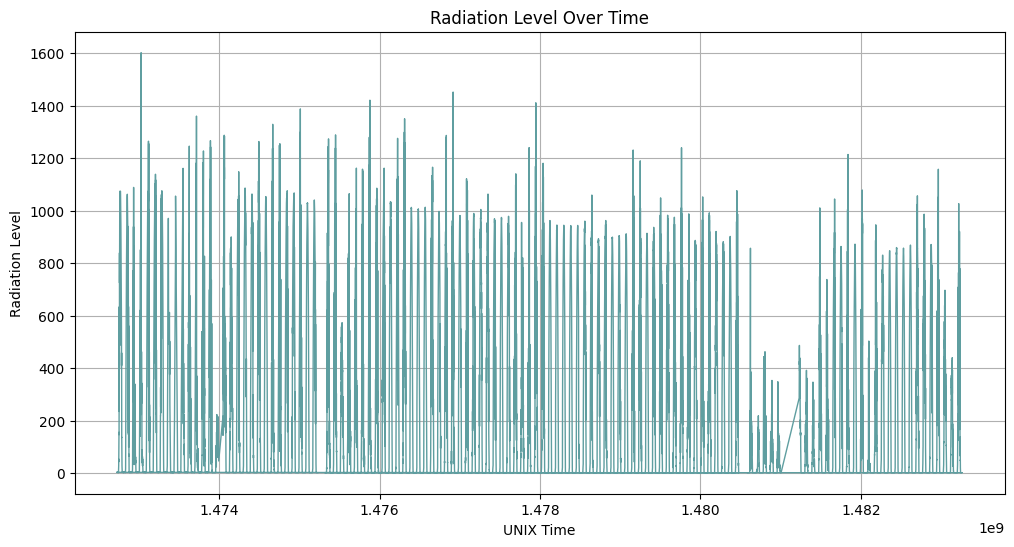

In [67]:
# Line Chart – UNIX Time vs Radiation

plt.figure(figsize=(12, 6))
plt.plot(df['UNIXTime'], df['Radiation'], color='cadetblue', linewidth=1)
plt.xlabel('UNIX Time')
plt.ylabel('Radiation Level')
plt.title('Radiation Level Over Time')
plt.grid(True)
plt.show()

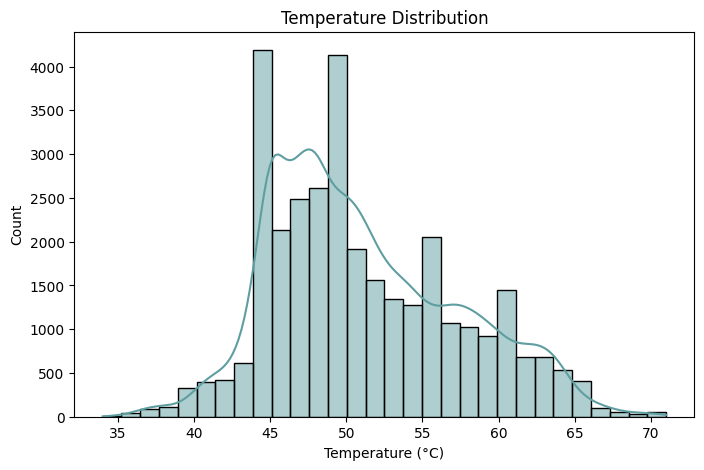

In [69]:
#  Histogram – Temperature Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['Temperature'], bins=30, kde=True, color='cadetblue')
plt.xlabel('Temperature (°C)')
plt.title('Temperature Distribution')
plt.show()

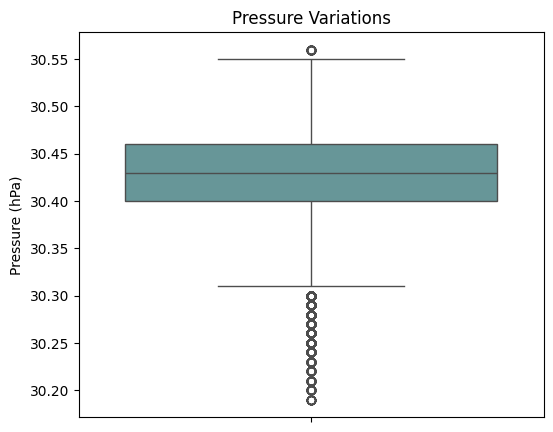

In [76]:
# Box Plot for Pressure column

plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Pressure'], color='cadetblue')
plt.title('Pressure Variations')
plt.ylabel('Pressure (hPa)')
plt.show()

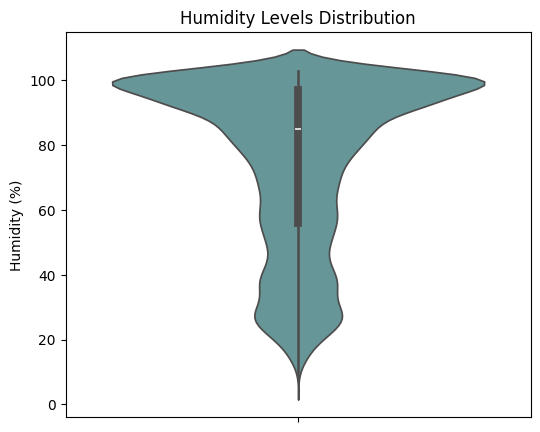

In [81]:
#   Violin Plot – Humidity Levels

plt.figure(figsize=(6, 5))
sns.violinplot(y=df['Humidity'], color='cadetblue')
plt.title('Humidity Levels Distribution')
plt.ylabel('Humidity (%)')
plt.show()

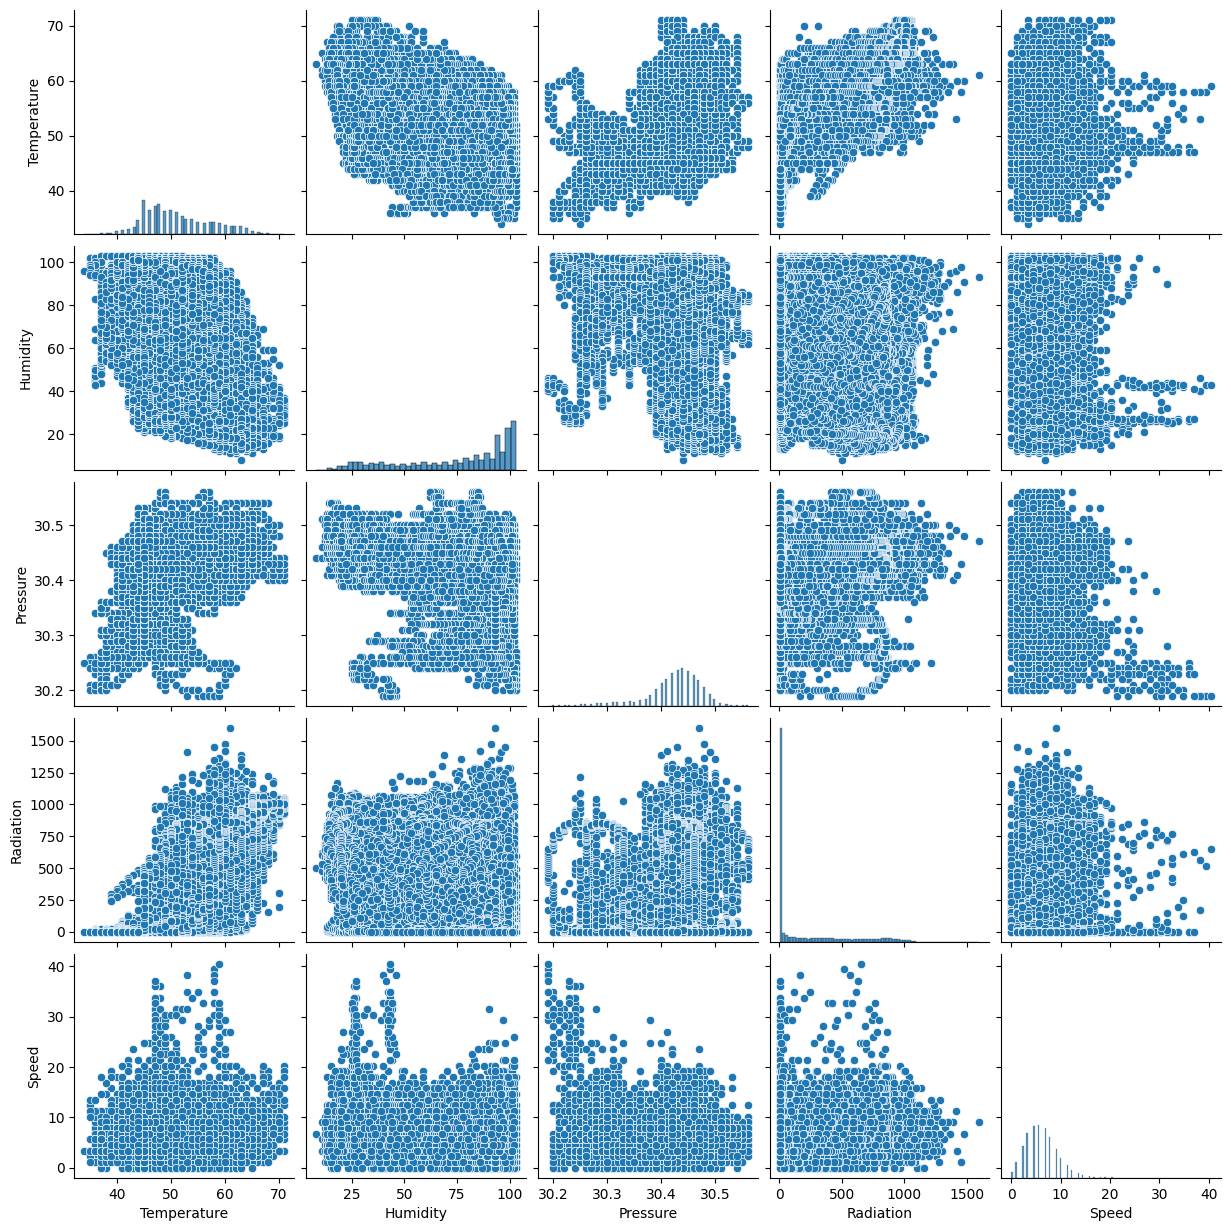

In [82]:
# Pairplot – Relationship Between Multiple Features

sns.pairplot(df[['Temperature', 'Humidity', 'Pressure', 'Radiation', 'Speed']])
plt.show()

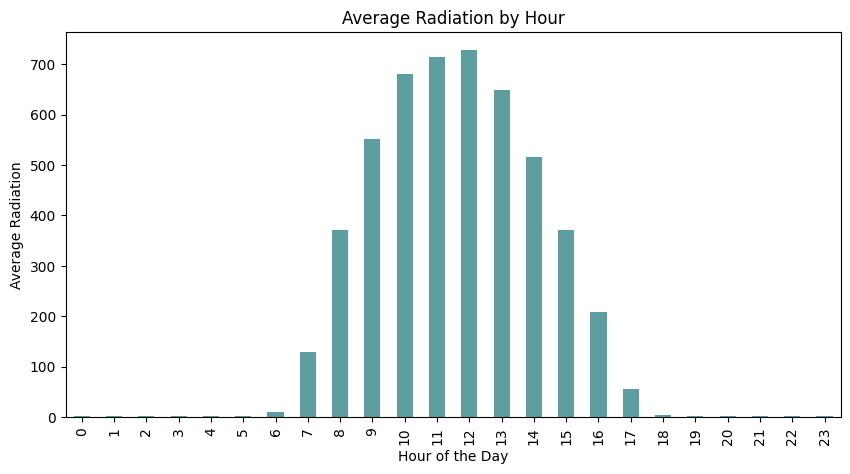

In [84]:
# Bar Chart – Average Radiation by Hour

df['Hour'] = pd.to_datetime(df['Time']).dt.hour 
hourly_radiation = df.groupby('Hour')['Radiation'].mean()

plt.figure(figsize=(10, 5))
hourly_radiation.plot(kind='bar', color='cadetblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Radiation')
plt.title('Average Radiation by Hour')
plt.show()

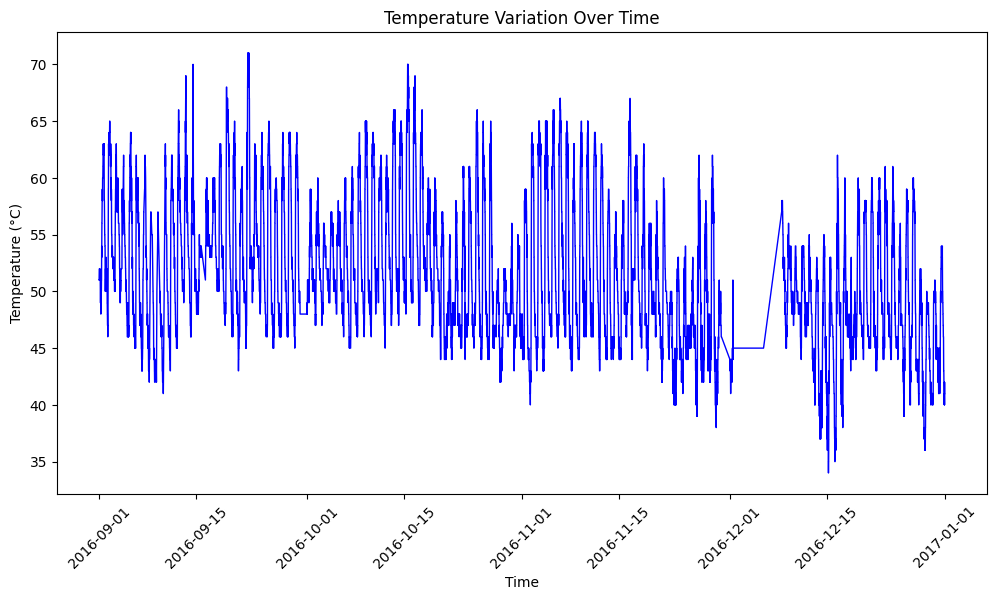

In [85]:
# Line Chart – Temperature Over Time

df['Timestamp'] = pd.to_datetime(df['Data'] + ' ' + df['Time'])  
df = df.sort_values(by='Timestamp')

plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Temperature'], color='blue', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation Over Time')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [54]:
# Using regex to extract time from Time column

import re

df['Time_Hour'] = df['Time'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['Time_Minute'] = df['Time'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
df['Time_Second'] = df['Time'].apply(lambda x: re.search(r'\d+$', x).group(0)).astype(int)
df = df.drop('Time', axis=1)



df['SunriseHour'] = df['TimeSunRise'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['SunriseMinute'] = df['TimeSunRise'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
df['SunsetHour'] = df['TimeSunSet'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['SunsetMinute'] = df['TimeSunSet'].apply(lambda x: re.search(r'(?<=:)\d+(?=:)', x).group(0)).astype(int)
df = df.drop(['TimeSunRise', 'TimeSunSet'], axis=1)


In [55]:
# Dropping unwanted column

df.drop(columns=['Data'],inplace=True)
df.drop(columns=['SunriseHour'],inplace=True)

In [56]:
X = df.drop('Radiation', axis=1)
y = df['Radiation']

In [57]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=300,shuffle=True)

## Model Building

In [58]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [59]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [60]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging, Decision_tree,Svr,Knn]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.6208689387578508,
 0.9329175753817335,
 0.9426627917199533,
 0.8111833053065299,
 0.8869628730359271,
 0.9332181491277612,
 0.89732077802116,
 -0.41853918375083365,
 0.9439371482968517]

## Model Prediction

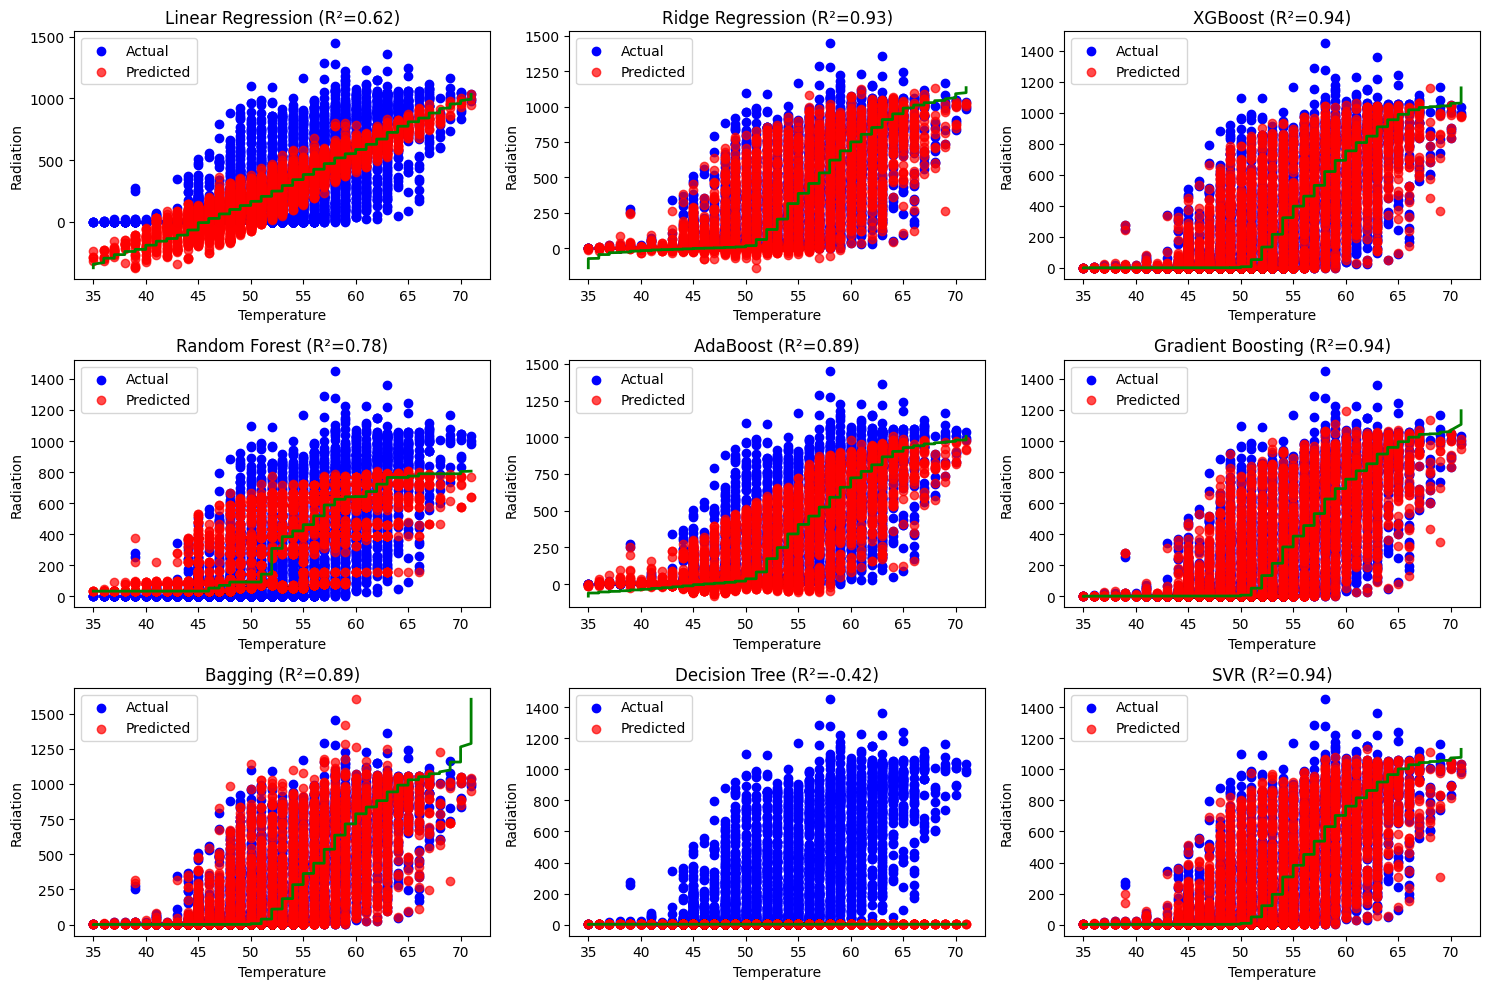

Linear Regression: R² Score = 0.6209
Ridge Regression: R² Score = 0.9329
XGBoost: R² Score = 0.9427
Random Forest: R² Score = 0.8112
AdaBoost: R² Score = 0.8870
Gradient Boosting: R² Score = 0.9332
Bagging: R² Score = 0.8973
Decision Tree: R² Score = -0.4185
SVR: R² Score = 0.9439
KNN: R² Score = 0.6209


In [ ]:
model_names = ["Linear Regression", "Ridge Regression", "XGBoost", "Random Forest", "AdaBoost", "Gradient Boosting", "Bagging", "Decision Tree", "SVR", "KNN"]

plt.figure(figsize=(15, 10))

for i, model in enumerate(model_li):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    Score.append(r2)

    plt.subplot(3, 3, i+1)
    plt.scatter(X_test['Temperature'], y_test, color='blue', label="Actual")
    plt.scatter(X_test['Temperature'], y_pred, color='red', label="Predicted", alpha=0.7)
    plt.plot(np.sort(X_test['Temperature']), np.sort(y_pred), color='green', linewidth=2)
    plt.title(f"{model_names[i]} (R²={r2:.2f})")
    plt.xlabel("Temperature")
    plt.ylabel("Radiation")
    plt.legend()

plt.tight_layout()
plt.show()

for name, score in zip(model_names, Score):
    print(f"{name}: R² Score = {score:.4f}")